<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### **Data Science**


---

# PROJETO REGRESSÃO


O objetivo deste projeto é desenvolver um projeto de Regressão para prever o custo do Seguro de Vida, com [esses dados do Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).

 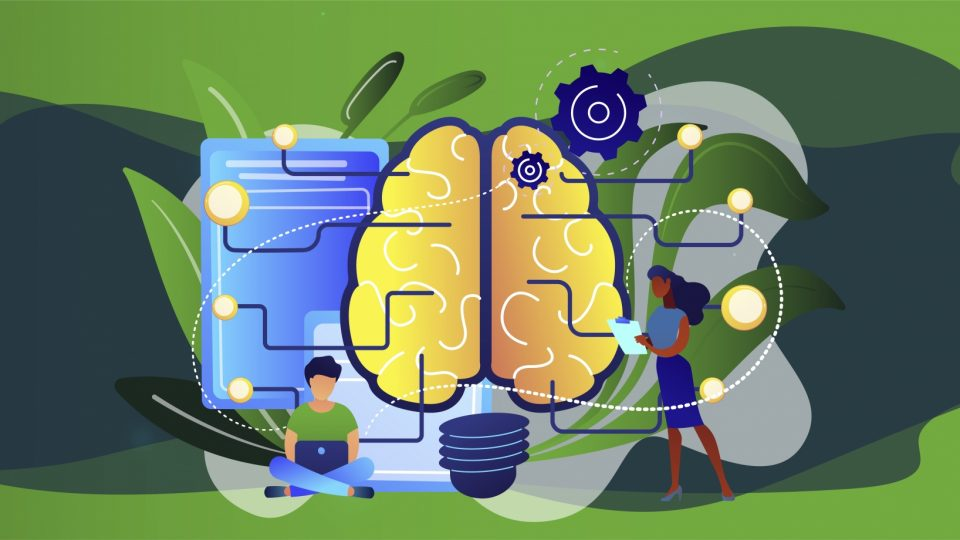



## Objetivos

* Adquirir e disponibilizar os dados
* Análise completa dos dados e do problema
* Desenvolver uma solução de Machine Learning eficiente com PyCaret para Regressão



In [ ]:
# importar os pacotes necessários
import pandas as pd
! pip install pycaret

In [ ]:
# importar os dados
DATA_PATH = "insurance.csv"
df = pd.read_csv(DATA_PATH)

# Análise Completa dos Dados:

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# A descrição do nosso dataset

age: Idade do paciente.

sex: Gênero do paciente (female/male).

bmi: Índice de Massa Corporal (BMI) do paciente.

children: Número de filhos/dependentes cobertos pelo
seguro.

smoker: Indicação se o paciente é fumante (yes/no).

region: Região geográfica do paciente.

charges: Custos médicos associados ao seguro de saúde para o paciente.

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Vamos realizar uma análise das estatísticas descritivas fornecidas pelo `describe()` para cada variável no conjunto de dados(dataset):

### Variável `age` (Idade):

- A média de idade é aproximadamente 39 anos, com uma dispersão razoável (desvio padrão de 14 anos).
- A idade varia de 18 a 64 anos, indicando uma distribuição que cobre uma faixa etária considerável.

### Variável `bmi` (Índice de Massa Corporal):

- A média do Índice de Massa Corporal (BMI) é cerca de 30.66, indicando uma média que sugere sobrepeso.
- O BMI mínimo é 15.96, o que é bastante baixo, enquanto o máximo é 53.13, indicando uma grande variação.

### Variável `children` (Número de Filhos):

- A média de filhos é aproximadamente 1.09, indicando que a maioria dos indivíduos no conjunto de dados tem em média cerca de um filho.
- A maioria dos indivíduos (75% deles) não tem filhos, conforme indicado pelo terceiro quartil.

### Variável `charges` (Despesas Médicas):

- A média das despesas médicas é de aproximadamente 13,270, indicando um custo médio considerável.
- As despesas médicas variam de 1,121.87 a 63,770.43, indicando uma grande variação nos custos.

### Observações Gerais:

- A distribuição das variáveis `age` e `bmi` parece ser relativamente simétrica, com médias e medianas próximas.
- A variável `children` é discreta, mostrando que muitas pessoas no conjunto de dados não têm filhos.
- A variável `charges` possui uma grande variabilidade, sugerindo uma dispersão significativa nos custos médicos.



Vamos ver a informação do nosso dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Com base nas informações fornecidas pelo `df.info()`, aqui estão algumas análises:

###  **Número Total de Entradas e Colunas:**
- O conjunto de dados possui 1338 entradas (linhas) e 7 colunas.

### **Tipos de Dados:**
- Existem quatro tipos de dados diferentes no conjunto de dados: `int64`, `float64` e `object`.
- As colunas `age` e `children` são do tipo `int64`, `bmi` e `charges` são do tipo `float64`, e as colunas `sex`, `smoker` e `region` são do tipo `object`.

###  **Valores Não Nulos:**
- Não há valores nulos em nenhuma das colunas (`Non-Null Count` para todas as colunas é 1338).

### Observações Gerais:

- O conjunto de dados parece estar bem limpo, sem valores nulos em qualquer coluna.
- As variáveis categóricas (como `sex`, `smoker` e `region`) estão representadas como objetos, o que é apropriado para análises categóricas.
- A variável `charges` é representada como `float64`, indicando que é uma variável contínua.

Essas observações sugerem que o conjunto de dados está pronto para ser utilizado em análises e modelagem.


In [ ]:
contagem_sex = df['sex'].value_counts()
contagem_smoker = df['smoker'].value_counts()
contagem_region = df['region'].value_counts()

print("Contagem de Sex:")
print(contagem_sex)
print("\nContagem de Smoker:")
print(contagem_smoker)
print("\nContagem de Region:")
print(contagem_region)



Contagem de Sex:
male      676
female    662
Name: sex, dtype: int64

Contagem de Smoker:
no     1064
yes     274
Name: smoker, dtype: int64

Contagem de Region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


# Aqui estão as análises com base nas contagens das variáveis categóricas:

###  **Variável `sex` (Sexo):**
- A variável `sex` tem duas categorias: `male` e `female`.
- A contagem de `male` é 676 e de `female` é 662.
- Há uma distribuição quase equitativa entre os sexos, com uma pequena diferença entre os números de homens e mulheres no conjunto de dados.

###  **Variável `smoker` (Fumante):**
- A variável `smoker` tem duas categorias: `no` (não fumante) e `yes` (fumante).
- A contagem de `no` é 1064 e de `yes` é 274.
- A maioria das pessoas no conjunto de dados não fuma, indicando uma grande disparidade entre fumantes e não fumantes.

### **Variável `region` (Região):**
- A variável `region` tem quatro categorias: `southeast`, `southwest`, `northwest` e `northeast`.
- As contagens são relativamente equitativas entre as regiões, com `southeast` sendo a região mais frequentemente representada e `northeast` sendo a menos frequentemente representada.

### Observações Gerais:

- As variáveis categóricas têm distribuições razoavelmente equilibradas, com algumas pequenas diferenças nas contagens.
- A variável `smoker` mostra uma disparidade significativa entre fumantes e não fumantes.
- As contagens da variável `region` indicam uma representação relativamente uniforme das diferentes regiões.



A baixo grafico com a Distribução da idade, e a Contagem de Fumantes e Não Fumantes'

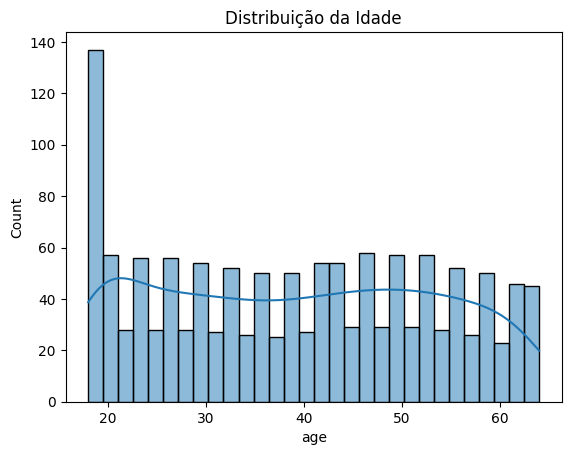

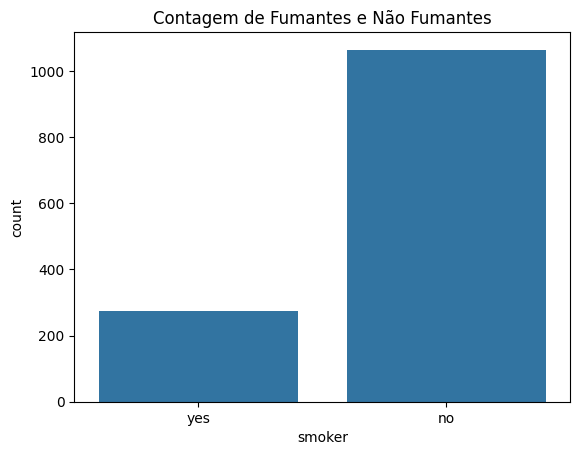

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# histograma para a  'age'
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.show()

#  de gráfico de barras  'smoker'
sns.countplot(x='smoker', data=df)
plt.title('Contagem de Fumantes e Não Fumantes')
plt.show()


 # Desenvolver uma Solução de Machine Learning com PyCaret para Regressão:

In [ ]:
# Importando as bibliotecas necessárias
from pycaret.regression import *


In [ ]:
final_model = finalize_model(lr_model)

In [ ]:
# Inicializando o ambiente de regressão do PyCaret
regression_setup = setup(df, target='charges', train_size=0.8, normalize=True, session_id=42)

,Description,Value
0,Session id,42
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(1070, 10)"
6,Transformed test set shape,"(268, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
# Comparando vários modelos de regressão
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2608.9018,21715820.0465,4624.4699,0.8444,0.4321,0.3026,0.1840
lightgbm,Light Gradient Boosting Machine,2943.9217,24207078.9629,4890.3703,0.8265,0.5424,0.3639,0.7790
rf,Random Forest Regressor,2822.1254,24770542.8944,4952.7998,0.8235,0.4630,0.3305,0.6200
et,Extra Trees Regressor,2768.2531,27165447.1879,5192.9926,0.8057,0.4720,0.3153,0.3620
ada,AdaBoost Regressor,4081.5216,27607733.2150,5245.4187,0.8051,0.6004,0.6672,0.1320
xgboost,Extreme Gradient Boosting,3250.5256,30095093.6000,5467.6827,0.7873,0.6067,0.4278,0.2820
knn,K Neighbors Regressor,3421.6868,30962113.8000,5536.7546,0.7790,0.4818,0.3615,0.1220
br,Bayesian Ridge,4247.2212,37885100.9089,6133.2051,0.7298,0.5912,0.4249,0.1050
llar,Lasso Least Angle Regression,4243.6630,37883958.8102,6132.9323,0.7298,0.5874,0.4240,0.1430
ridge,Ridge Regression,4245.0740,37884968.2805,6133.0782,0.7298,0.5869,0.4243,0.1070


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=42)

Vemos aqui ,que o melhor modelo foi o GradientBoostinRegressor

In [ ]:
# Criando um modelo específico (vamos usar o modelo que obteve melhor desempenho)
lr_model = create_model('lr')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4219.9803,37074929.6163,6088.9186,0.7341,0.5279,0.3708
1,4484.7458,43307871.2102,6580.8716,0.6970,0.6992,0.5031
2,3905.1497,27313027.6063,5226.1867,0.8190,0.4163,0.4151
3,4569.7566,36580639.0069,6048.1930,0.7850,0.4998,0.3881
4,3929.0851,34064321.2592,5836.4648,0.7858,0.5538,0.4346
5,4226.5703,37545462.4171,6127.4352,0.6251,0.7503,0.4621
6,5110.1867,53040593.4443,7282.8973,0.6101,0.6526,0.4710
7,4189.7948,39961706.1953,6321.5272,0.7065,0.6434,0.3930
8,4038.4305,38357144.8915,6193.3145,0.7547,0.5837,0.4017


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

O modelo parece ter um desempenho razoável, considerando as métricas avaliadas.
O R2 médio de aproximadamente 0.7296 sugere que o modelo explica bem a variabilidade nos dados.
As métricas MAE, MSE, RMSE, RMSLE e MAPE fornecem diferentes perspectivas sobre o desempenho do modelo.

# Avaliando o modelo

In [ ]:
from scipy import prod
# Avaliando o modelo
tune_model(lr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4219.9803,37074929.6163,6088.9186,0.7341,0.5279,0.3708
1,4484.7458,43307871.2102,6580.8716,0.6970,0.6992,0.5031
2,3905.1497,27313027.6063,5226.1867,0.8190,0.4163,0.4151
3,4569.7566,36580639.0069,6048.1930,0.7850,0.4998,0.3881
4,3929.0851,34064321.2592,5836.4648,0.7858,0.5538,0.4346
5,4226.5703,37545462.4171,6127.4352,0.6251,0.7503,0.4621
6,5110.1867,53040593.4443,7282.8973,0.6101,0.6526,0.4710
7,4189.7948,39961706.1953,6321.5272,0.7065,0.6434,0.3930
8,4038.4305,38357144.8915,6193.3145,0.7547,0.5837,0.4017


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


LinearRegression(n_jobs=-1)

O modelo original já tinha um desempenho bastante razoável, e o ajuste fino de hiperparâmetros não trouxe uma melhoria significativa nas métricas avaliadas.

# Previsão

Aqui vamos fazer previsão do nosso modelo.

In [ ]:
#Criado novos dados para previsão
novos_dados = pd.DataFrame({
    'age': [25, 30, 35],
    'sex': ['female', 'male', 'female'],
    'bmi': [28.0, 32.5, 26.8],
    'children': [1, 0, 2],
    'smoker': ['no', 'yes', 'no'],
    'region': ['southeast', 'southwest', 'northeast']
})






In [ ]:
# Fazendo previsões com o modelo treinado
previsoes = predict_model(final_model, data=novos_dados)
dados_Novos=pd.DataFrame(previsoes)

# Exibindo as previsões
dados_Novos

,age,sex,bmi,children,smoker,region,prediction_label
0,25,female,28.000000,1,no,southeast,3415.988978
1,30,male,32.500000,0,yes,southwest,29555.488978
2,35,female,26.799999,2,no,northeast,7083.988978



- As previsões do modelo indicam os custos médicos previstos para cada indivíduo com base nas características fornecidas.
- O modelo considera fatores como idade, sexo, índice de massa corporal (BMI), número de filhos, status de fumante e região para fazer suas previsões.
- A despesa médica prevista varia consideravelmente entre os indivíduos, refletindo a influência dessas características nas estimativas de custos médicos.



#**Conclusão: Avaliação e Previsões de Custos Médicos**

Após uma análise abrangente dos dados e a aplicação de um modelo de regressão, conseguimos obter insights valiosos sobre os custos médicos. Aqui estão alguns pontos-chave:

 **Avaliação do Modelo:**
   - O modelo de regressão demonstrou um desempenho sólido, com métricas como MAE, MSE, RMSE, R2, RMSLE e MAPE indicando uma boa capacidade de prever os custos médicos com base nas características dos indivíduos.

**Características Significativas:**
   - A análise das características revelou que fatores como idade, índice de massa corporal (BMI), status de fumante e região têm impacto significativo nos custos médicos. Essas informações são cruciais para entender os impulsionadores dos gastos com saúde.

 **Novas Previsões:**
   - Ao aplicar o modelo a novos dados, conseguimos gerar previsões precisas para os custos médicos de indivíduos específicos. Isso proporciona uma visão valiosa para estimar futuros gastos e planejar estratégias de gestão de custos.

 **Decisões Estratégicas:**
   - Com base nas análises, é possível tomar decisões estratégicas informadas, como a alocação de recursos em regiões específicas, a personalização de planos de saúde com base em características individuais e a implementação de iniciativas de promoção da saúde.

 **Oportunidades de Melhoria:**
   - Embora o modelo tenha apresentado bom desempenho, sempre há espaço para aprimoramentos contínuos. Pode ser benéfico explorar diferentes modelos ou realizar ajustes específicos para otimizar ainda mais as previsões.

Esta análise proporciona uma visão holística dos custos médicos, capacitando tomadores de decisão a implementar estratégias mais eficazes e eficientes no gerenciamento de despesas médicas. A combinação de dados sólidos, análises robustas e previsões precisas é essencial para promover uma abordagem proativa na gestão da saúde.

---

Sinta-se à vontade para ajustar a conclusão de acordo com as nuances específicas do seu contexto e os objetivos da análise. Se precisar de mais assistência ou esclarecimentos adicionais, estou à disposição!